# Lab Assignment 2- Andrew White
## 200020141

Github Link; placeholder.github.com

#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

#### Now you are ready to start!

# Main Assignment

### Key Modules

In [6]:
!pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify earthpy rasterio

In [4]:
import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

### Part 1- Python Basics

In [8]:
# Task 1

x = 2

if x % 3 == 0:
    print(x,"is divisible by 3 !")
    
else:
    print(x,"is not divisible by 3.")

2 is not divisible by 3.


In [9]:
#Task 2

fruit = "strawberry"

if fruit == "apple" or fruit == "orange" or fruit == "pear" or fruit == "kiwi" or fruit == "strawberry":
    print(fruit, "is acceptible")
    
else:
    print(fruit, 'is not acceptible')

strawberry is acceptible


In [10]:
#Task 3

# First, define the radius of Earth in km.
radius_earth_km = 6371

co_ordinate_A = [4,6]
co_ordinate_B = [8,7]


# Defining the latitude and longitude of A using the list index;
lat_a = co_ordinate_A[0]
long_a = co_ordinate_A[1]

# Then, do the same for B;
lat_b = co_ordinate_B[0]
long_b = co_ordinate_B[1]


# Then, calculate a, make sure to use radians (radians = degrees * np.pi/180)

a = m.sin((lat_b - lat_a) / 2 * (m.pi / 180))**2 + ( m.cos(lat_a * (m.pi / 180)) * m.cos(lat_b * (m.pi / 180)) * m.sin((long_b - long_a) / 2 * (m.pi / 180))**2) # Sin squared via math (imported as as m) is m.sin()**2 
        
# Now for c, radians have already been computed in a;

c = 2 * m.atan2(m.sqrt(a), m.sqrt(1 - a))

#Finally, for d;

d = c * radius_earth_km

print("The distance between the two co-ordinates using the Haversine formula is",d,"km.")

The distance between the two co-ordinates using the Haversine formula is 458.3154685164799 km.


### Part 2- Pandas and NumPy

In [2]:
# Task 1
# First, import the csv

trees_df = pd.read_csv('/arcgis/home/Assignment_2/Part_2_and_3/portland_park_trees.csv', sep=",", header=0, encoding="ISO-8859-1")

# Then, filter by the genus and print(len(trees_quercus_acer))
trees_quercus_acer = trees_df[(trees_df["Genus"]=="Quercus") | (trees_df["Genus"]=="Acer")]
print(len(trees_quercus_acer))

NameError: name 'pd' is not defined

###### There are 5675 trees that are of either the Quercus or Acer genus.

In [88]:
# Task 2 here


# Filter trees_quercus_acer dataframe by DBH larger than 50 inches then, print(len(trees_quercus_acer-50)).

trees_quercus_acer_50 = trees_quercus_acer[(trees_quercus_acer["DBH"] > 50)]
print(len(trees_quercus_acer_50))




124


###### There are 124 trees that are of the Quercus or Acer genus with a DBH larger than 50 inches.

In [89]:
# Task 3

# create dataframes for each
trees_quercus = trees_df[(trees_df["Genus"]=="Quercus")]
trees_acer = trees_df[(trees_df["Genus"]=="Acer")]
trees_fraxinus = trees_df[(trees_df["Genus"]=="Fraxinus")]

#Then, print the mean DBH of each

print("The mean DBH of Quercus trees is",trees_quercus["DBH"].mean(), "inches.")
print("The mean DBH of Acer trees is",trees_acer["DBH"].mean(), "inches.")
print("The mean DBH of Fraxinus trees is",trees_fraxinus["DBH"].mean(), "inches.")

The mean DBH of Quercus trees is 23.56823839157492 inches.
The mean DBH of Acer trees is 18.419085331846066 inches.
The mean DBH of Fraxinus trees is 11.033609693877551 inches.


###### The genus with the highest mean DBH is Quercus.

In [90]:
# Task 4
# To find number of Genuses, look for "unique" value in .describe().
trees_acer["Genus_spec"].describe()


count                 3586
unique                  20
top       Acer platanoides
freq                  1502
Name: Genus_spec, dtype: object

###### There are 20 different tree species in the Acer genus.

In [15]:
# Task 5

In [91]:
# Importing the dataframe;

cities_df = pd.read_csv('/arcgis/home/Assignment_2/Part_2_and_3/world_cities.csv', sep=",", header=0, encoding="ISO-8859-1")

In [92]:
# Creating the new row;

cities_df["pop_M"] = cities_df["pop"] / 1000000

In [93]:
# Removing the column;

cities_df = cities_df.drop("pop", axis=1)

In [94]:
# Subset starting with first letter of my name (so A);

My_city = "Abuja"

chosen_city = cities_df[cities_df["city"] == My_city]

In [95]:
# To select the 5 biggest in the country;

# 1- Pick out the cities country using iloc

selected_country = chosen_city["country"].iloc[0]

# 2- subset cities_df based off of selected_country
cities_chosen_country = cities_df[cities_df["country"] == selected_country]

# 3- Sort by population using .sort_values
cities_chosen_country_sorted_pop = cities_chosen_country.sort_values(by="pop_M", ascending=False)

#4- print the 5 top results using .head(5)
cities_chosen_country_sorted_pop.head(5)


city  country    lat   lon  capital     pop_M
19988          Lagos  Nigeria   6.45  3.47        0  9.020089
17093           Kano  Nigeria  12.00  8.52        0  3.739214
15095         Ibadan  Nigeria   7.38  3.93        0  3.707361
16643         Kaduna  Nigeria  10.52  7.44        0  1.619164
29567  Port Harcourt  Nigeria   4.78  7.00        0  1.177191

### Part 3- Python Data Visualization

Text(0.5, 1.0, 'Scatterplot of Ulmus Trees: DBH vs. Tree Height')

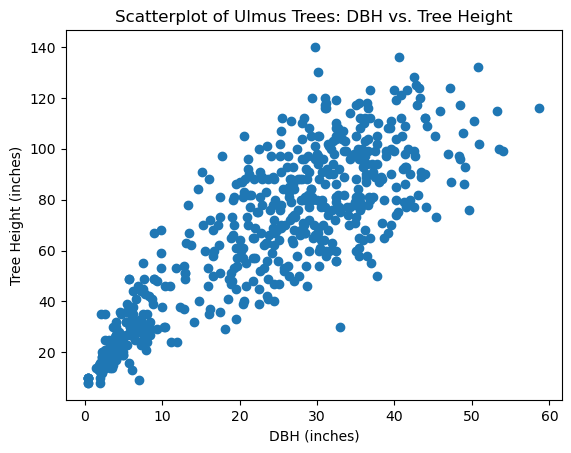

In [21]:
# Graph 1- scatterplot for just trees in the Ulmus genus;

# First, create an Ulmus dataframe
trees_ulmus = trees_df[(trees_df["Genus"] == "Ulmus")]

# Now, plot

plt.scatter(trees_ulmus["DBH"], trees_ulmus["TreeHeight"])

plt.xlabel("DBH (inches)")
plt.ylabel("Tree Height (inches)")
plt.title('Scatterplot of Ulmus Trees: DBH vs. Tree Height')

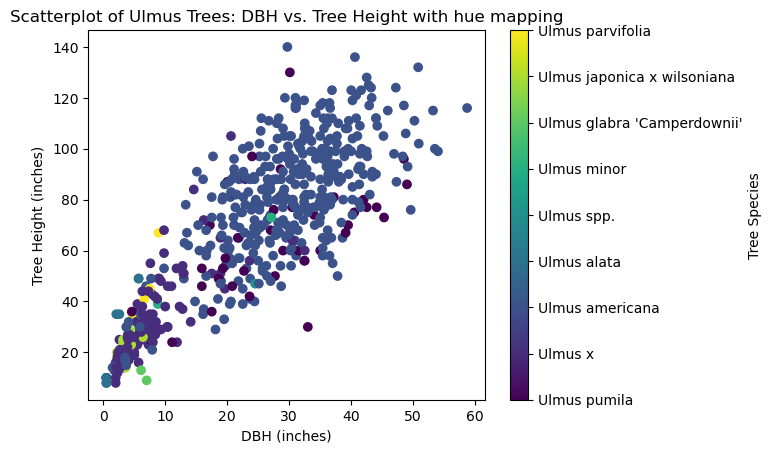

In [31]:
# Graph 2
#To create the hue mapping,

# First, create a numerical mapping for Genus_spec
genus_spec_mapping = {genus_spec: i for i, genus_spec in enumerate(trees_ulmus['Genus_spec'].unique())}

# Then, map the Genus_spec to numerical values using .loc 
trees_ulmus.loc[:, 'Genus_spec_num'] = trees_ulmus['Genus_spec'].map(genus_spec_mapping)

# Then, create a scatter plot with hue mapped to Genus_spec
plt.scatter(trees_ulmus["DBH"], trees_ulmus["TreeHeight"], c = trees_ulmus["Genus_spec_num"], cmap='viridis')

# Set axis labels
plt.xlabel("DBH (inches)")
plt.ylabel("Tree Height (inches)")

# Set plot title
plt.title('Scatterplot of Ulmus Trees: DBH vs. Tree Height with hue mapping')

# Add a colorbar with Genus_spec labels
colourbar = plt.colorbar(label = "Tree Species")

# Set colorbar tick labels
colourbar.set_ticks(list(genus_spec_mapping.values()))
colourbar.set_ticklabels(list(genus_spec_mapping.keys()))
# Show the plot
plt.show()


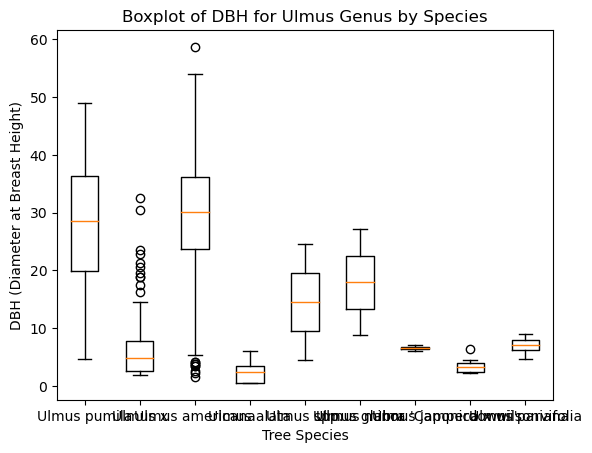

In [23]:
#Graph 3- Boxplot

plt.boxplot([trees_ulmus[trees_ulmus['Genus_spec'] == genus_spec]['DBH'] for genus_spec in trees_ulmus['Genus_spec'].unique()],
            labels = trees_ulmus['Genus_spec'].unique())
plt.xlabel('Tree Species')
plt.ylabel('DBH (Diameter at Breast Height)')
plt.title('Boxplot of DBH for Ulmus Genus by Species')
plt.show()

Text(0.5, 1.0, 'All Three Graphs Together')

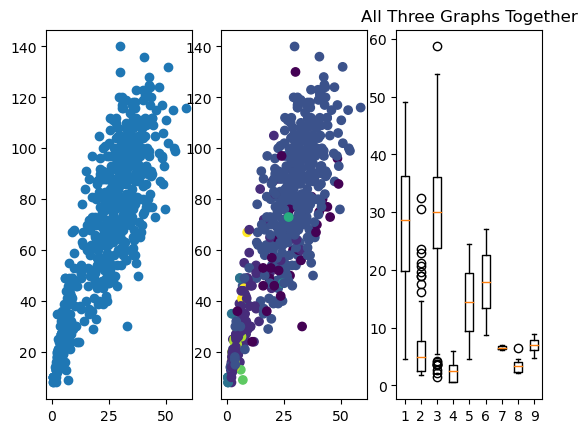

In [24]:
# To plot them all together, use fig, ax = plt.subplots()

fig, (ax_scatter1, ax_scatter2, ax_box) = plt.subplots(1,3)

ax_scatter1.scatter(trees_ulmus["DBH"], trees_ulmus["TreeHeight"]) # Plot 1
ax_scatter2.scatter(trees_ulmus["DBH"], trees_ulmus["TreeHeight"], c = trees_ulmus["Genus_spec_num"], cmap='viridis') # Plot 2
ax_box.boxplot([trees_ulmus[trees_ulmus['Genus_spec'] == genus_spec]['DBH'] for genus_spec in trees_ulmus['Genus_spec'].unique()]) # Plot 3)

# This should plot all three graphs together without legend.
# Give it a title;
plt.title("All Three Graphs Together")

### Part 4- Python GeoPandas

In [84]:
#Task 1

# My data; Wind Turbines in the Highland Council area, https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search;jsessionid=4961F8CC376FB01DA1D7115C26D43CFD#/metadata/1ab6d829-9f6d-4fee-bd4a-f267d01bb292

# First, import as a dataframe;
wind_turbines_highland = gpd.read_file('/arcgis/home/Assignment_2/Part_4/Wind_Turbines.shp')


In [85]:
# Task 2- first and last 5 values.
print(wind_turbines_highland.head(5))
print(wind_turbines_highland.tail(5))

   OBJECTID          Site_Name  Hub_Height  Rotor_Diam  Blade_Top  \
0         1      Kirkhill Farm        20.6        11.1      26.15   
1         2  Forss Wind Farm 1        50.0        52.0      76.00   
2         3  Forss Wind Farm 2        47.0        62.0      78.00   
3         4  Forss Wind Farm 2        47.0        62.0      78.00   
4         5  Forss Wind Farm 1        50.0        52.0      76.00   

       Planning_R          Turbine_Ty      kW       Status OnOffshore  \
0    12/02778/FUL                 C&F    15.0  Constructed    OnShore   
1  01/00030/FULCA           Bonus B52  1000.0  Constructed    OnShore   
2  01/00380/FULCA  Siemens SWT-1.3-62  1300.0  Constructed    OnShore   
3  01/00380/FULCA  Siemens SWT-1.3-62  1300.0  Constructed    OnShore   
4  01/00030/FULCA           Bonus B52  1000.0  Constructed    OnShore   

  PublishYN                       geometry  
0         Y  POINT (309521.135 961965.491)  
1         Y  POINT (301983.101 969550.335)  
2         Y

In [86]:
# Task 3- Explore by turbine power (kW)

wind_turbines_highland.explore(column='kW', cmap='RdYlBu')

In [74]:
# Task 4- Finding the Co-ordinate Reference System;

print("The Co-ordinate reference system is",wind_turbines_highland.crs,".")

The Co-ordinate reference system is epsg:27700 .


In [75]:
# Task 5

# Use print(len) to find out the number of features;

print("There are", len(wind_turbines_highland), "turbines in the dataset.",)

There are 4010 turbines in the dataset.


In [76]:
# Task 6
# The categorical dataset is going to be the Limekiln Wind Farm

wind_turbines_Limekiln = wind_turbines_highland[(wind_turbines_highland["Site_Name"] == "Limekiln Wind Farm")]


In [77]:
# Task 7
# The neumerical subset is going to be higher power turbines above 3000 kw.

wind_turbines_high_power_highland = wind_turbines_highland[(wind_turbines_highland["kW"] > 3000)]


Text(0.5, 1.0, 'Choropleth Map of High Power Turbines in Highlands')

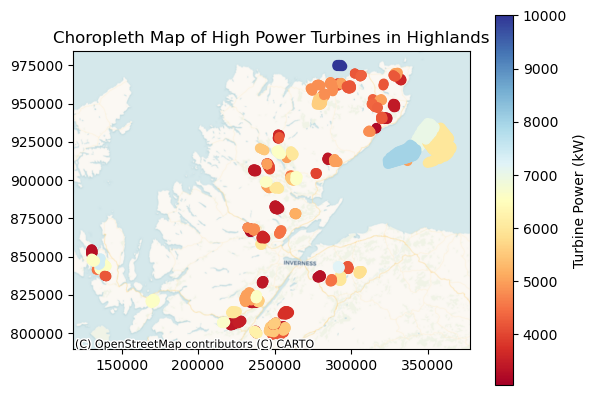

In [78]:
#Task 8
# Chloropleh map based off the high power turbines and Site_Name, set a variable called with_basemap to add a basemap.;
with_basemap = wind_turbines_high_power_highland.plot(column="kW", cmap="RdYlBu", legend=True, legend_kwds={'label': "Turbine Power (kW)", 'orientation': "vertical"})


# Then, use contextily to add a basemap- specifying the crs found earlier.
ctx.add_basemap(with_basemap, crs = wind_turbines_highland.crs, source=ctx.providers.CartoDB.Voyager)

plt.title('Choropleth Map of High Power Turbines in Highlands')




### Part 5-  Python Rasterio

In [110]:
# Task 1- Reading the dataset

elev_canada = rio.open('/arcgis/home/Assignment_2/Part_5/elev.tif')


In [111]:
# Task 2- finding the CRS

print("The CRS of the dataset is", elev_canada.crs,"." )

The CRS of the dataset is EPSG:32617 .


In [112]:
 # Task 3- describing
    
print("The raster extent is", elev_canada.bounds, ", the reference system is", elev_canada.crs, "and there is", elev_canada.count, "band in the dataset.")

The raster extent is BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138) , the reference system is EPSG:32617 and there is 1 band in the dataset.


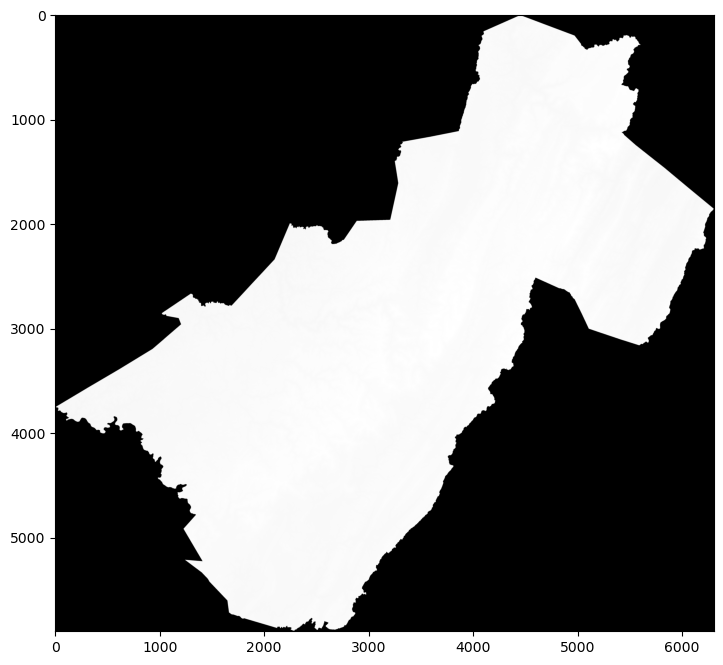

In [115]:
# Task 4- Plot / Map

# First, create an array
elev_arr = elev_canada.read(1)

#Then, do an image_read_masked of this array
image_read_masked = np.ma.masked_array(elev_arr, mask=(elev_arr == 0))

#Finally, use matplotlib to plot the map in grayscale;

plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(image_read_masked, cmap="gist_gray")

##### There is clearly something interfering with this map. To check, create a histogram as in step 5.

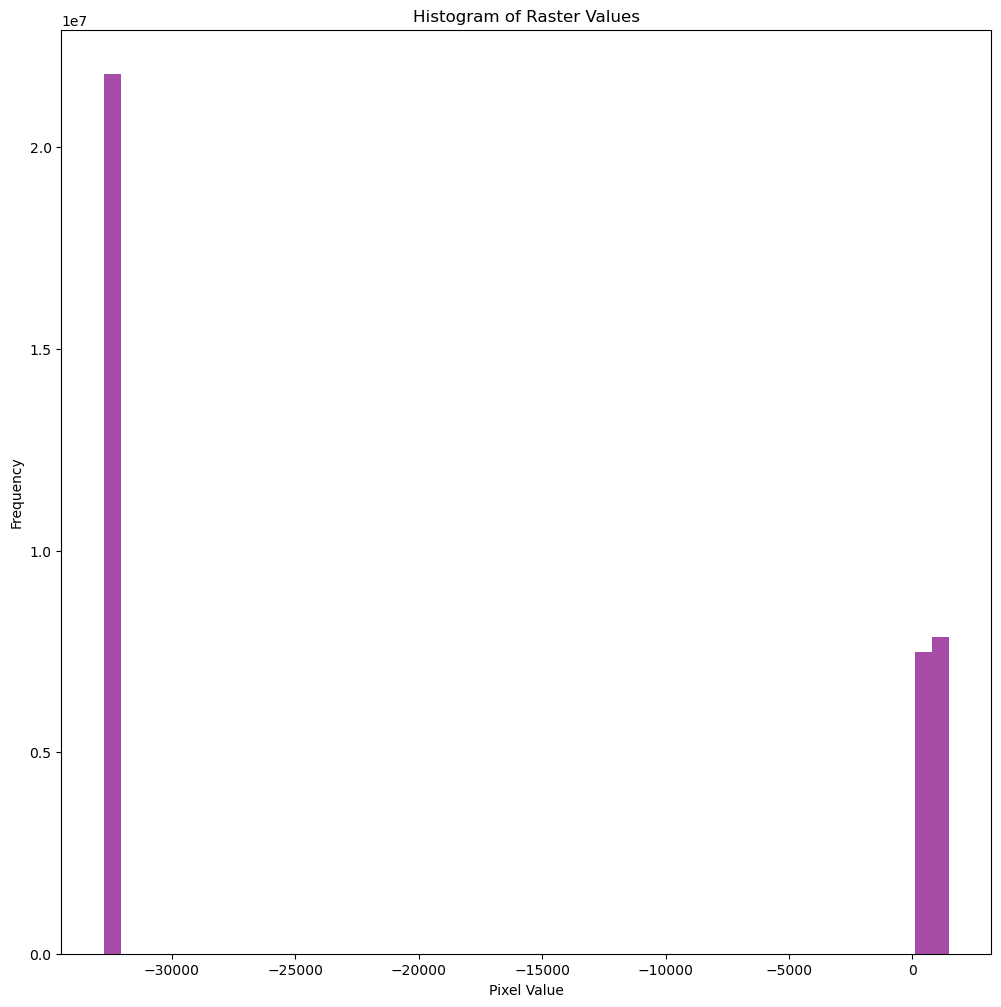

In [126]:
# Task 5- Histogram to mask out values;

ep.hist(elev_arr, bins=50, colors="purple", alpha=0.7, xlabel="Pixel Value", ylabel="Frequency")
plt.title('Histogram of Raster Values')
plt.show()

###### From this, there is a peak past -30000. To mask this out, set a threshold of above zero.

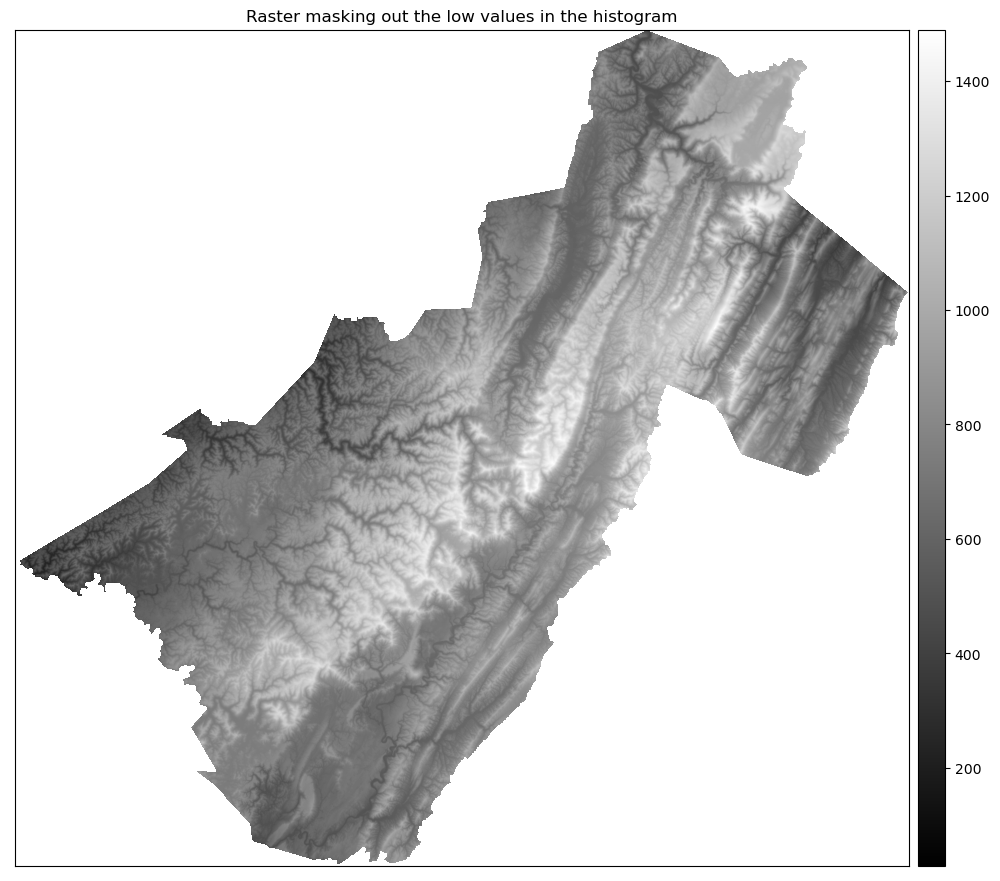

In [129]:
# Creating a mask;

mask = elev_arr < 0
elev_masked = np.ma.masked_array(elev_arr, mask)

# Now, plot the masked elevation;
ep.plot_bands(elev_masked, cmap="gray", title="Raster masking out the low values in the histogram")
plt.show()


##### Much better now!

### Part 6- K-Means – DBSCAN clustering (in Google Colab)